Feature Engineering /-> Standardization

In [77]:
import numpy as np # for linear algebra
import pandas as pd # for data processing
import matplotlib.pyplot as plt
import seaborn as sns

In [78]:
df=pd.read_csv('Social_Network_Ads.csv')

In [79]:
df.sample(4)

,User ID,Gender,Age,EstimatedSalary,Purchased
147,15749130,Female,41,30000,0
233,15614187,Male,49,86000,1
364,15654456,Male,42,104000,1
382,15715622,Female,44,139000,1


In [80]:
df =df.iloc[:,2:]

In [81]:
df.sample(2)

,Age,EstimatedSalary,Purchased
359,42,54000,0
70,25,80000,0


Train Test Splittig

In [82]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(df.drop('Purchased', axis=1),
                                                  df['Purchased'],
                                                  test_size=0.5,
                                                  random_state=0)
X_train.shape, X_test.shape

((200, 2), (200, 2))

StandardScaler

In [83]:
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()

#this will understand and learn parameters from the data
scaler.fit(X_train) 

X_train_scaled=scaler.transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [84]:
scaler.mean_

array([3.778e+01, 6.646e+04])

In [85]:
X_train_scaled[5:10]

array([[ 0.89763835,  1.37285634],
       [ 1.48178478,  2.25780886],
       [-0.27065451, -1.16400755],
       [ 1.96857347,  1.01887533],
       [ 0.70292287, -0.63303603]])

In [86]:
X_train_scaled=pd.DataFrame(X_train_scaled, columns = X_train.columns)
X_test_scaled=pd.DataFrame(X_test_scaled, columns = X_test.columns)

In [87]:
np.round(X_train.describe(),1)

,Age,EstimatedSalary
count,200.0,200.0
mean,37.8,66460.0
std,10.3,33985.2
min,18.0,15000.0
25%,30.0,38750.0
50%,37.0,62500.0
75%,46.0,82250.0
max,60.0,150000.0


In [88]:
np.round(X_train_scaled.describe(),1)

,Age,EstimatedSalary
count,200.0,200.0
mean,-0.0,-0.0
std,1.0,1.0
min,-1.9,-1.5
25%,-0.8,-0.8
50%,-0.1,-0.1
75%,0.8,0.5
max,2.2,2.5


Non-Scaling vs Scaling 

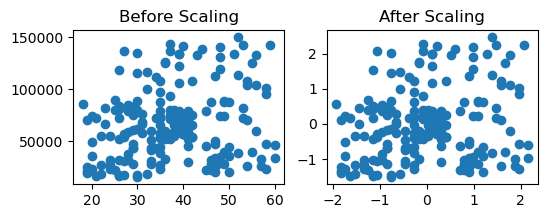

In [89]:
fig, (ax1, ax2)=plt.subplots(ncols=2, figsize=(6,2))

ax1.scatter(X_train['Age'],X_train['EstimatedSalary'])
ax1.set_title("Before Scaling")
ax2.scatter(X_train_scaled['Age'],X_train_scaled['EstimatedSalary'])
ax2.set_title("After Scaling")

plt.show()

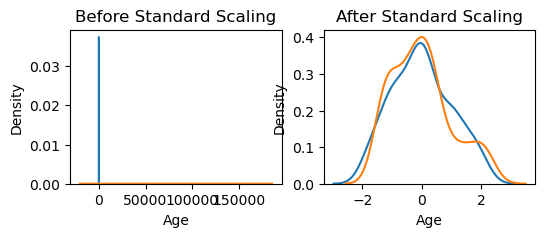

In [90]:

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(6, 2))


ax1.set_title('Before Standard Scaling')
sns.kdeplot(X_train['Age'], ax=ax1)
sns.kdeplot(X_train['EstimatedSalary'], ax=ax1)


ax2.set_title('After Standard Scaling')
sns.kdeplot(X_train_scaled['Age'], ax=ax2)
sns.kdeplot(X_train_scaled['EstimatedSalary'], ax=ax2)
plt.show()

Comparison of Distributions

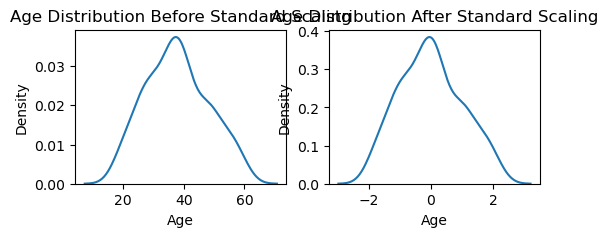

In [91]:

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(6, 2))


ax1.set_title('Age Distribution Before Standard Scaling')
sns.kdeplot(X_train['Age'], ax=ax1)


ax2.set_title('Age Distribution After Standard Scaling')
sns.kdeplot(X_train_scaled['Age'], ax=ax2)
plt.show()

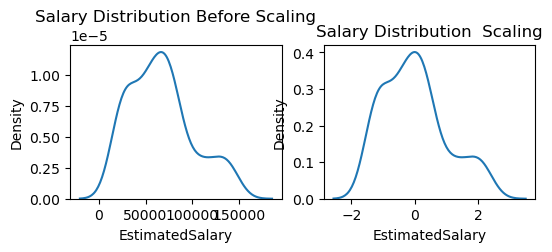

In [92]:

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(6, 2))

ax1.set_title('Salary Distribution Before Scaling')
sns.kdeplot(X_train['EstimatedSalary'], ax=ax1)


ax2.set_title('Salary Distribution  Scaling')
sns.kdeplot(X_train_scaled['EstimatedSalary'], ax=ax2)
plt.show()


Importance of scaling by measuring accuracy

In [93]:
from sklearn.linear_model import LogisticRegression

In [94]:
lr = LogisticRegression()
lr_scaled = LogisticRegression()

In [96]:
lr.fit(X_train,y_train)
lr_scaled.fit(X_train_scaled,y_train)

LogisticRegression()

In [97]:
y_pred=lr.predict(X_test)
y_pred_scaled=lr_scaled.predict(X_test_scaled)

In [98]:
from sklearn.metrics import accuracy_score

In [102]:
print("Actual",accuracy_score(y_test,y_pred))
print("Scaled",accuracy_score(y_test,y_pred_scaled))

Actual 0.825
Scaled 0.825
